In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_csv = pd.read_csv('ex2data1.txt', header=None)
data_csv

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [149]:
data = data_csv.to_numpy()
data

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ],
       [45.08327748, 56.31637178,  0.        ],
       [61.10666454, 96.51142588,  1.        ],
       [75.02474557, 46.55401354,  1.        ],
       [76.0987867 , 87.42056972,  1.        ],
       [84.43281996, 43.53339331,  1.        ],
       [95.86155507, 38.22527806,  0.        ],
       [75.01365839, 30.60326323,  0.        ],
       [82.30705337, 76.4819633 ,  1.        ],
       [69.36458876, 97.71869196,  1.        ],
       [39.53833914, 76.03681085,  0.        ],
       [53.97105215, 89.20735014,  1.        ],
       [69.07014406, 52.74046973,  1.        ],
       [67.94685548, 46.67857411,  0.        ],
       [70.66150955, 92.92713789,  1.        ],
       [76.97878373, 47.57596365,  1.        ],
       [67.37202755, 42.83843832,  0.   

In [250]:
x = data[:, :2]
y = data[:, 2:]
x.shape, y.shape

((100, 2), (100, 1))

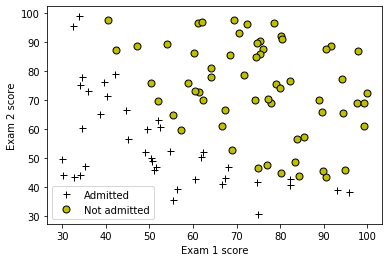

In [273]:
def plotData(x, y):
    # get all y == 1
    # pos = data[data[:, 2].nonzero(), :2]
    # get all y == 0
    # neg = data[np.where(data[:, 2] == 0), :2]
    pos = x[np.where(y == 0)[0], :]
    neg = x[np.where(y == 1)[0], :2]
    plt.plot(pos[:, 0], pos[:, 1], 'k+', linewidth=2, markersize=7)
    plt.plot(neg[:, 0], neg[:, 1], 'ko', MarkerFaceColor='y', markersize=7)
    plt.ylabel('Exam 2 score')
    plt.xlabel('Exam 1 score')
    plt.legend(['Admitted', 'Not admitted'])
    plt.show()

plotData(x, y)

In [323]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def cost_function(theta, X, y):
    m = X.shape[0]
    theta_reshape = theta.reshape(3,1)
    h = sigmoid(np.dot(X, theta_reshape));
    J = 1.0 / m * ( -np.dot(y.T,  np.log(h)) - np.dot((1-y).T, np.log(1 - h)))
    return J[0]

def grad_function(theta, X, y):
    theta_reshape = theta.reshape(3,1)
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta_reshape))
    grad = 1.0 / m * np.dot(X.T, (h-y))
    return grad.flatten()

In [324]:
row, col = x.shape
X = np.append(np.ones((row, 1)), x, axis=1)

initial_theta = np.zeros((col + 1))
cost_function(initial_theta, X, y), grad_function(initial_theta, X, y)

(0.6931471805599452, array([ -0.1       , -12.00921659, -11.26284221]))

In [327]:
import scipy.optimize as op
m, n = X.shape
initial_data = np.zeros(n)
# x0 must be（n,0）
result = op.minimize(fun = cost_function, x0 = initial_data, args = (X, y), method = 'TNC', jac = grad_function)

optimal_theta = result.x
result

     fun: 0.20349770158947433
     jac: array([9.07652441e-09, 9.36760996e-08, 4.82243362e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131869,   0.20623159,   0.20147149])

In [333]:
prob = sigmoid(np.dot(np.array([1,45,85]), optimal_theta.reshape(3,1)))
prob

array([0.77629062])

In [341]:
def predict(theta, X):
    m = X.shape[0]
    temp = sigmoid(np.dot(X, optimal_theta.reshape(3,1)))
    p = temp > 0.5
    return p

# Compute accuracy on our training set
p = predict(optimal_theta, X)
np.mean(np.double(p == y)) * 100

89.0

In [346]:
# regularization with logistic regression
data_csv = pd.read_csv('ex2data2.txt', header=None)
data = data_csv.to_numpy()
x_reg = data[:, :2]
y_reg = data[:, 2:]
x_reg.shape, y_reg.shape

((118, 2), (118, 1))

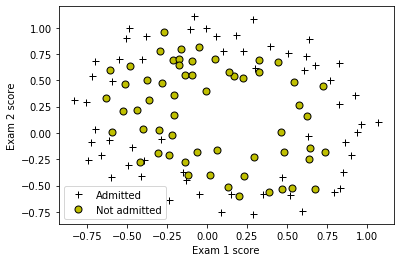

In [347]:
plotData(x_reg, y_reg)

In [633]:
# Returns a new feature array with more features, comprising of 
# X1, X2, X1.^2, X1*X2, X2.^2, X1.^3, X1.^2*X2, X1 * X2.^2, X2.^3, X1.^4, X1.^3 * X2, X1.^2 * X2.^2, X1.^1 * X2.^3 
# X2.^4, X1.^5, X1.^4*X2, X1.^3*X2.^2,X1.^2*X2.^3, X1*X2.^4, X2.^5, X1.^6, X1.^5*X2, X1.^4*X2.^2, X1.^3*X2.^3, 
# X1.^2*X2.^4, X1.^1*X2.^5, X2.^6
def map_feature(X1, X2):
    degree = 6
    out = np.empty((118,0))
    for i in np.arange(1,degree+1):
        for j in np.arange(i+1):
            new_col = (X1 ** (i-j)) * (X2 ** j)
            out = np.append(out, new_col, axis=1)
    return out

X_reg = map_feature(x_reg[:,0:1], x_reg[:,1:2])
X_reg.shape

(118, 27)

In [648]:
def cost_function_reg(theta, X, y, lambda_reg):
    m = y.size
    grad = np.zeros(theta.size)
    theta_reshape = theta.reshape(theta.size,1)
    h = sigmoid(np.dot(X, theta_reshape));
    J = 1.0 / m * (np.dot(-y.T, np.log(h)) - np.dot((1-y).T, np.log(1 - h))) + lambda_reg / (2.0 * m) * np.sum(np.dot(theta_reshape[1:,:].T, theta_reshape[1:,:]))
    return np.sum(J)

def grad_function_reg(theta, X, y, lambda_reg):
    m = y.size
    theta_reshape = theta.reshape(theta.size,1)
    grad = np.zeros(theta.size)
    h = sigmoid(np.dot(X, theta_reshape))
    grad = 1.0 / m * np.dot(X.T, (h-y)) + lambda_reg / m * (np.append([0], theta_reshape[1:, :]).reshape(theta_reshape.size, 1))
    return grad


In [649]:
initial_theta_reg = np.zeros((X_reg.shape[1], 1))
lambda_reg = 1

J = cost_function_reg(initial_theta_reg, X_reg, y_reg, lambda_reg)
grad = grad_function_reg(initial_theta_reg, X_reg, y_reg, lambda_reg)
J, grad

(0.6931471805599453, array([[1.87880932e-02],
        [7.77711864e-05],
        [5.03446395e-02],
        [1.15013308e-02],
        [3.76648474e-02],
        [1.83559872e-02],
        [7.32393391e-03],
        [8.19244468e-03],
        [2.34764889e-02],
        [3.93486234e-02],
        [2.23923907e-03],
        [1.28600503e-02],
        [3.09593720e-03],
        [3.93028171e-02],
        [1.99707467e-02],
        [4.32983232e-03],
        [3.38643902e-03],
        [5.83822078e-03],
        [4.47629067e-03],
        [3.10079849e-02],
        [3.10312442e-02],
        [1.09740238e-03],
        [6.31570797e-03],
        [4.08503006e-04],
        [7.26504316e-03],
        [1.37646175e-03],
        [3.87936363e-02]]))

In [659]:
import scipy.optimize as op
m, n = X_reg.shape
initial_data = np.zeros(n)
lambda_reg = 1
# x0 must be（n,0）
result_reg = op.minimize(fun = cost_function_reg, x0 = initial_data, args = (X_reg, y_reg, lambda_reg), method = 'TNC', jac = grad_function_reg)

optimal_theta_reg = result_reg.x
result_reg

     fun: 0.5904292841109642
     jac: array([[-1.03995146e-06],
       [ 1.58084147e-06],
       [-2.37040509e-06],
       [ 4.28812685e-07],
       [-3.44468537e-07],
       [-5.15471922e-07],
       [ 1.43564836e-07],
       [ 2.82502921e-07],
       [-1.26820049e-07],
       [-1.34325828e-06],
       [ 1.26382717e-07],
       [-3.56650267e-07],
       [ 2.58164798e-07],
       [ 1.20019729e-07],
       [-6.01600577e-07],
       [ 3.87829107e-07],
       [-2.34776952e-09],
       [-1.05217684e-07],
       [ 2.66807016e-08],
       [-3.30566462e-08],
       [-1.35718030e-06],
       [ 1.42139840e-07],
       [-3.67536019e-07],
       [ 1.97746895e-07],
       [ 2.59748887e-07],
       [ 2.48488648e-07],
       [-4.42363018e-07]])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 30
     nit: 7
  status: 1
 success: True
       x: array([ 0.55697718,  1.09210329, -0.56794794, -0.93323353,  0.16045515,
        0.02700256, -0.39980013, -0.30454457, -0.16788046, -1.14269558,
       -0

In [661]:
# Compute accuracy on our training set
def predict_reg(theta, X):
    m = X.shape[0]
    temp = sigmoid(np.dot(X, optimal_theta.reshape(27,1)))
    p = temp > 0.5
    return p

p = predict_reg(optimal_theta_reg, X_reg)
np.mean(np.double(p == y_reg)) * 100

69.49152542372882